<a href="https://colab.research.google.com/github/joelsoaresjr/Relatorio_Carteira/blob/main/Relat%C3%B3rio_Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar bibliotecas necessárias

In [1]:
!pip uninstall pyfolio

In [2]:
!pip install yfinance
!pip install fpdf
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Importanto bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date
import seaborn as sns
import pyfolio as pf
import warnings
from scipy.stats import norm
from fpdf import FPDF

/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


Importar dados

In [6]:
acoes_base=['^BVSP']

nome = input("Digite seu nome:")
hoje = datetime.today()

while True:
  try:
    n_acoes = int(input("Digite o número de ações:"))
    break
  except:
    print("Digite um número inteiro!")

while True:
  try:
    capital = int(input('Digite o valor aplicado:'))
    break
  except:
    print("Digite um número inteiro!")




name_colunas = ["Ibovespa"]

for i in range(0,n_acoes):
    a = input('Digite o ticker da ação número %i:' %(i+1))
    acoes_base.append(a+".SA")
    name_colunas.append(a)

acoes = acoes_base[1:len(acoes_base)]

while True:
  try:
    ano_i=int(input('Digite o ano de início:'))
    mes_i=int(input('Digite o mês de início:'))
    dia_i=int(input('Digite o dia de início:'))
    ano_f=int(input('Digite o ano final:'))
    mes_f=int(input('Digite o mês final:'))
    dia_f=int(input('Digite o dia final:'))
    break
  except:
    print("Digite um número")


start = date(ano_i,mes_i,dia_i)
end = date(ano_f,mes_f,dia_f)


dados = yf.download(acoes_base, start, end)['Adj Close']
dados.columns = name_colunas 

indices_na = dados.loc[dados['Ibovespa'].isna()].index
dados = dados.drop(indices_na)

if 'USDBRL=X' in acoes:
  indices_na_dolar = dados.loc[dados['USDBRL=X'].isna()].index
  dados = dados.drop(indices_na_dolar)


Digite seu nome:Joel
Digite o número de ações:3
Digite o valor aplicado:PETR4
Digite um número inteiro!
Digite o valor aplicado:VALE3
Digite um número inteiro!
Digite o valor aplicado:10000
Digite o ticker da ação número 1:PETR4
Digite o ticker da ação número 2:VALE3
Digite o ticker da ação número 3:CAML3
Digite o ano de início:2018
Digite o mês de início:1
Digite o dia de início:1
Digite o ano final:2022
Digite o mês final:12
Digite o dia final:31
[*********************100%***********************]  4 of 4 completed


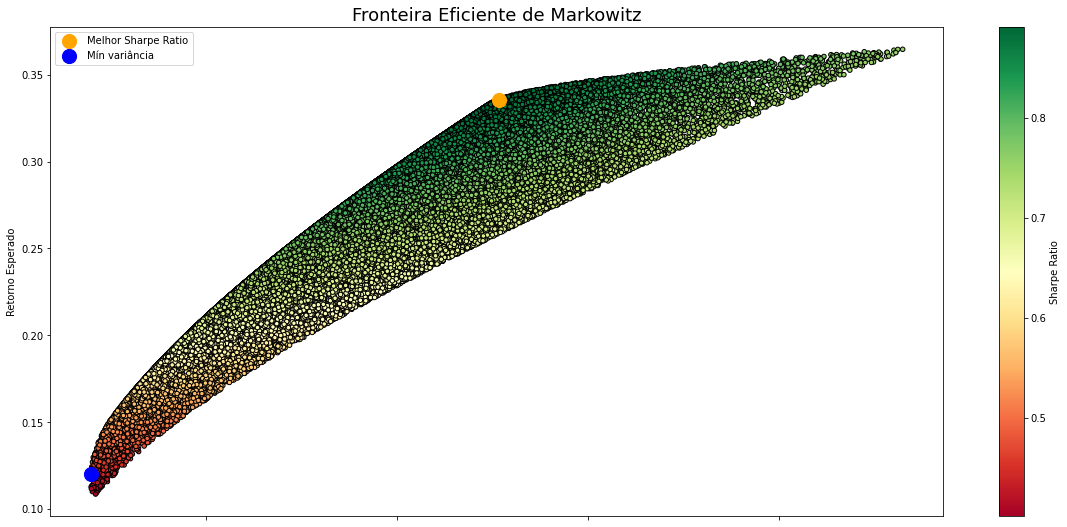

In [7]:
retorno_diario = dados.iloc[:, 1:len(acoes)+1].pct_change()
retorno_anual = retorno_diario.mean() * 250
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []
numero_acoes = len(acoes) 
numero_carteiras = 100000
np.random.seed(101)

for cada_carteira in range(numero_carteiras):

    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    retorno = np.dot(peso, retorno_anual)

    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))

    sharpe = retorno / volatilidade

    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]


df = pd.DataFrame(carteira)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()


carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]



df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(20, 9))
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='orange', 
            marker='o', s=200, label = 'Melhor Sharpe Ratio')
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'],
            c='blue', marker='o', s=200, label = 'Mín variância')

plt.legend()
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz',
          fontsize = 18)
plt.savefig('Fronteira Eficiente de Markowitz', dpi = 200)
     

In [8]:

print ("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print ('\n')
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   64237
Retorno        0.120045
Volatilidade   0.269928
Sharpe Ratio   0.444730
PETR4.SA Peso  0.000998
VALE3.SA Peso  0.064072
CAML3.SA Peso  0.934930


Essa é a carteira com maior Sharpe Ratio: 
                   33115
Retorno        0.335611
Volatilidade   0.376710
Sharpe Ratio   0.890901
PETR4.SA Peso  0.464645
VALE3.SA Peso  0.534939
CAML3.SA Peso  0.000416


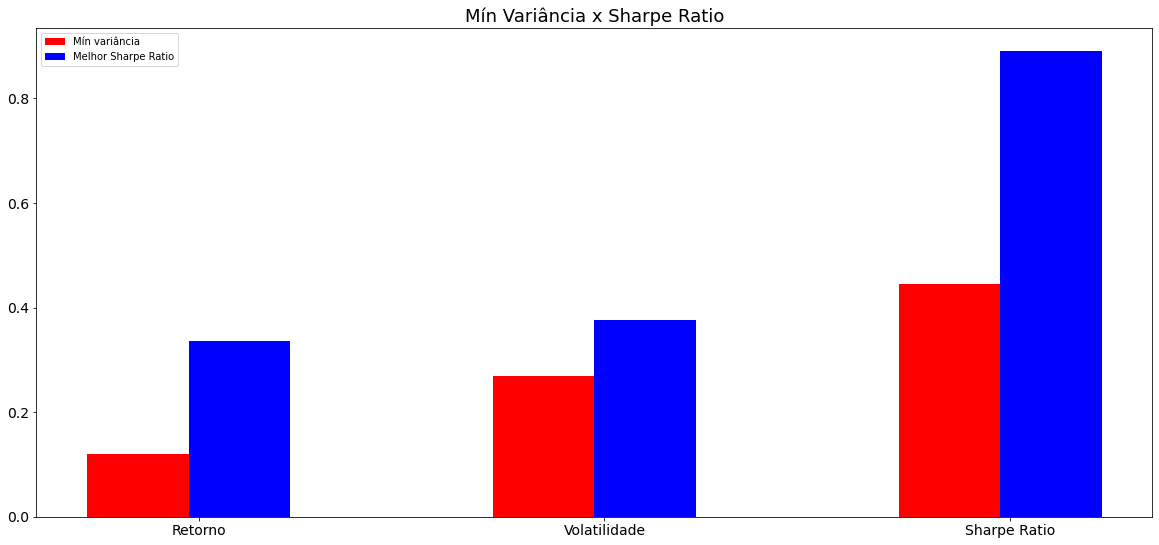

In [9]:
n = np.arange(3)
fig = plt.figure(figsize = (20,9))
plt.bar(n + 0.00, list(carteira_min_variancia.iloc[: , 0:3].values[0]), color = 'red', width = 0.25, label = 'Mín variância')
plt.bar(n + 0.25, list(carteira_sharpe.iloc[: , 0:3].values[0]), color = 'blue', width = 0.25, label = 'Melhor Sharpe Ratio')
plt.title('Mín Variância x Sharpe Ratio',
          fontsize = 18) 
plt.xticks(n + 0.15, ('Retorno', 'Volatilidade', 'Sharpe Ratio'),
           fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend() 
plt.savefig('Mín Variância x Sharpe Ratio', dpi = 200)

Escolha dos pesos

In [10]:
decisao = int(input("Digite 1 para pesos com Min Variância, 2 para melhor Sharpe ou 3 para próprios pesos: "))
if decisao == 1:
    pesos = carteira_min_variancia.iloc[: , 3:].values
    pesoacao = carteira_min_variancia.iloc[: , 3:]
    texto = 'VOCÊ ESCOLHEU PESOS PARA MENOR VOLATILIDADE!'
    print(texto)
elif decisao == 2:
    pesos = carteira_sharpe.iloc[: , 3:].values
    pesoacao = carteira_sharpe.iloc[: , 3:]
    texto = 'VOCÊ ESCOLHEU PESOS PARA MELHOR SHARPE RATIO!'
    print(texto)
else:
    pesos_input=[]
    texto = 'VOCÊ ESCOLHEU DIGITAR OS PESOS MANUALMENTE!'
    print(texto)
    for i in range(len(acoes)):
        p = float(input("Digite o peso, em porcentagem, da %s:" %(acoes[i])))
        pe = p/100
        pesos_input.append(pe)
    pesos = np.array(pesos_input)
     

Digite 1 para pesos com Min Variância, 2 para melhor Sharpe ou 3 para próprios pesos: 2
VOCÊ ESCOLHEU PESOS PARA MELHOR SHARPE RATIO!


Calculado retorno simples e acumulado

In [11]:
dados['Retorno'] = np.dot(dados.iloc[: , 1 : len(acoes) + 1].pct_change(), pesos.T)
dados['Retorno Carteira Acum.'] = (1 + dados['Retorno']).cumprod()
dados['Retorno Carteira Acum.'].iloc [0] = 1 

port_ibov = pd.DataFrame(dados["Ibovespa"].pct_change().iloc[ 1: ])
port_ibov.insert(loc = 1 , column = 'Portifólio', value = dados['Retorno'].iloc[ 1: ])


retorno_portifolio = np.dot(retorno_anual,pesos.T)
retorno_ibov = dados["Ibovespa"].pct_change().mean() * 250


var_mercado_aux = np.log(dados/dados.shift(1))
bov_var = var_mercado_aux["Ibovespa"].var()*250
var_acoes = []
for i in range(len(acoes)):
    var_acoes.append(retorno_diario.iloc[: , i].var()*250)
pfolio_var = np.dot(pesos, np.dot(retorno_diario.cov()*250,pesos.T)) 

pfolio_vol = pfolio_var ** 0.5 


resum_ibov = [retorno_ibov, bov_var**0.5, retorno_ibov/(bov_var**0.5)]
resum_port = [retorno_portifolio[0], pfolio_vol[0][0], retorno_portifolio[0]/pfolio_vol[0][0]]

Gráfico 1

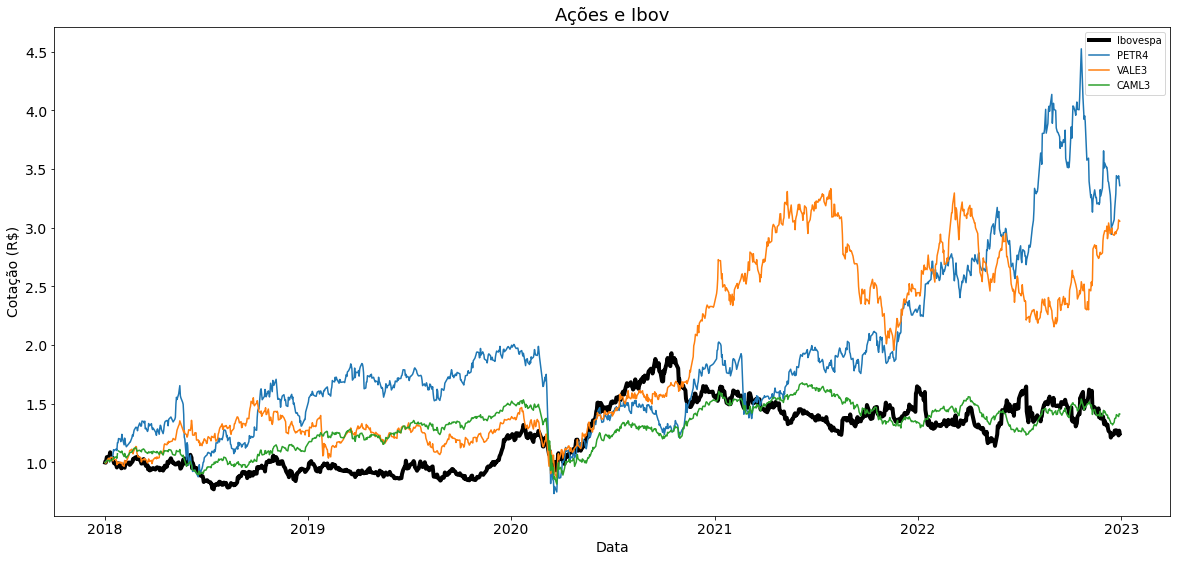

In [12]:
fig1 = plt.figure(figsize = (20,9))
plt.plot((dados.iloc[ : , 0]/dados.iloc[ 0 , 0]), c = 'black', linewidth = 4)
plt.plot(dados.iloc[ : , 1 : len(acoes) + 1]/dados.iloc[ 0 , 1 : len(acoes) + 1])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Cotação (R$)",
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)
plt.legend(dados.columns)
plt.title('Ações e Ibov',
          fontsize = 18)
plt.savefig('Ações e Ibov', dpi = 200)

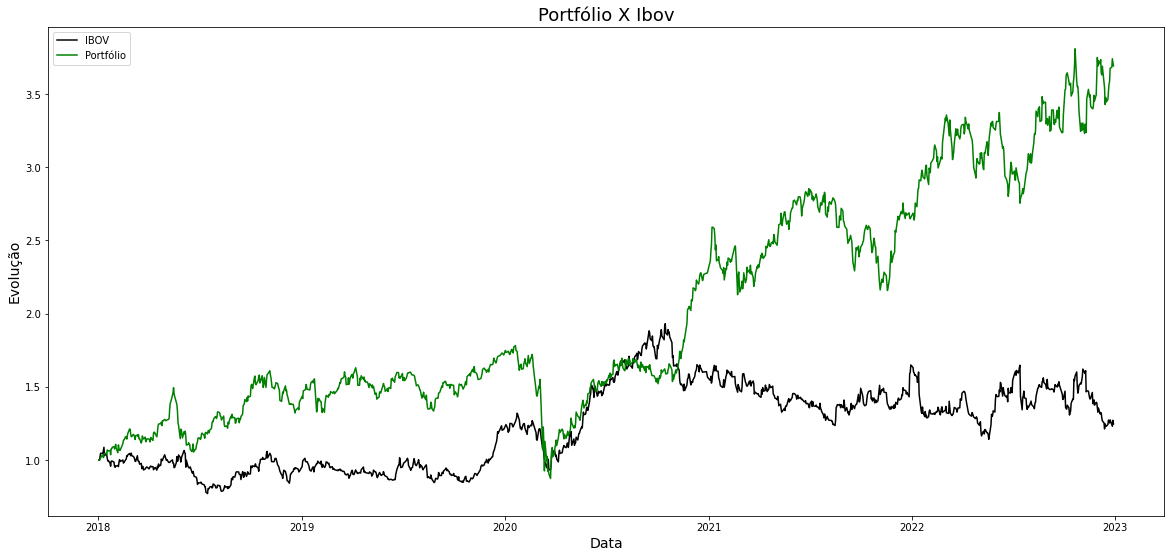

In [13]:
fig3 = plt.figure(figsize = (20,9))

plt.plot(dados.iloc[ : , 0]/dados.iloc[ 0 , 0], label = "IBOV" , c = "Black")
plt.plot(dados['Retorno Carteira Acum.'], label = "Portfólio", c = 'green')
plt.ylabel("Evolução",
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)
plt.legend()
plt.title("Portfólio X Ibov",
          fontsize = 18)
plt.savefig('Portfólio X Ibov', dpi = 200)

Gráfico 3

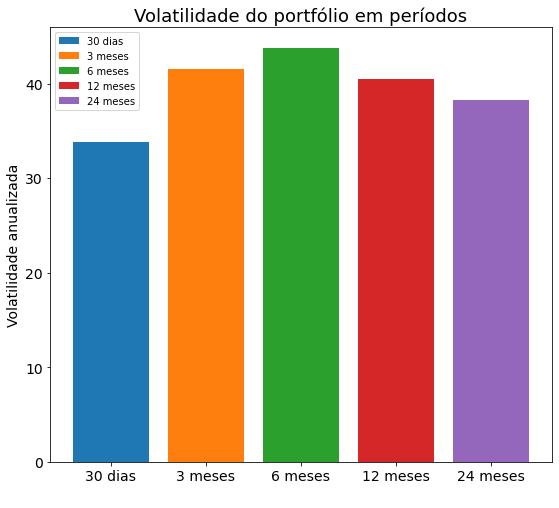

In [14]:
fig4 = plt.figure(figsize = (9,8))


x1 = '30 dias'
plt.bar(x1,port_ibov.iloc[len(port_ibov)-30:len(port_ibov),0].std() *255 ** 0.5 *100, label = x1)
x2 = '3 meses'
plt.bar(x2,port_ibov.iloc[len(port_ibov)-90:len(port_ibov),0].std() *255 ** 0.5 *100, label = x2)
x3 = '6 meses'
plt.bar(x3,port_ibov.iloc[len(port_ibov)-180:len(port_ibov),0].std() *255 ** 0.5 *100, label = x3)
x4 = '12 meses'
plt.bar(x4,port_ibov.iloc[len(port_ibov)-360:len(port_ibov),0].std() *255 ** 0.5 *100, label = x4)
x5 = '24 meses'
plt.bar(x5,port_ibov.iloc[len(port_ibov)-720:len(port_ibov),0].std() *255 ** 0.5 *100, label = x5)

plt.ylabel('Volatilidade anualizada',
           fontsize = 14)
plt.xlabel('  ',
           fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.title("Volatilidade do portfólio em períodos",
          fontsize = 18)
plt.savefig('Volatilidade do portfólio em períodos', dpi = 200)

Gráfico 4

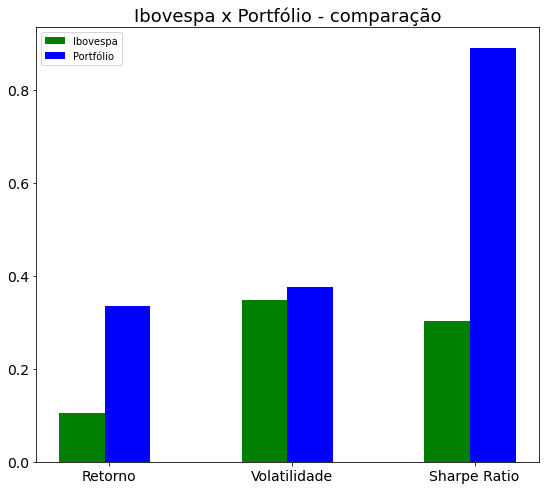

In [15]:
fig5 = plt.figure(figsize = (9,8))

n = np.arange(3)
plt.bar(n + 0.00, resum_ibov, color = 'green', width = 0.25, label = 'Ibovespa')
plt.bar(n + 0.25, resum_port, color = 'blue', width = 0.25, label = 'Portfólio')
plt.title('Ibovespa x Portfólio - comparação',
          fontsize = 18) 
plt.xticks(n + 0.15, ('Retorno', 'Volatilidade', 'Sharpe Ratio'))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend() 
plt.savefig('Ibovespa x Portfólio - comparação', dpi = 200)

Gráfico 5

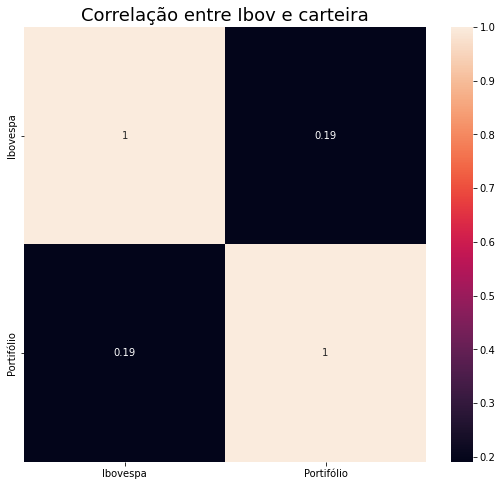

In [16]:
fig6 = plt.figure(figsize = (9,8))

plt.title("Correlação entre Ibov e carteira", fontsize = 18);
matriz_correlação_pfolio_ibov= port_ibov.corr()
matiz_correlacao_acoes_ibov = dados.iloc[ : , 0: len(acoes_base)].corr()

sns.heatmap(matriz_correlação_pfolio_ibov, annot = True)
plt.savefig('Correlação entre Ibov e carteira', dpi = 200)

Gráfico 6

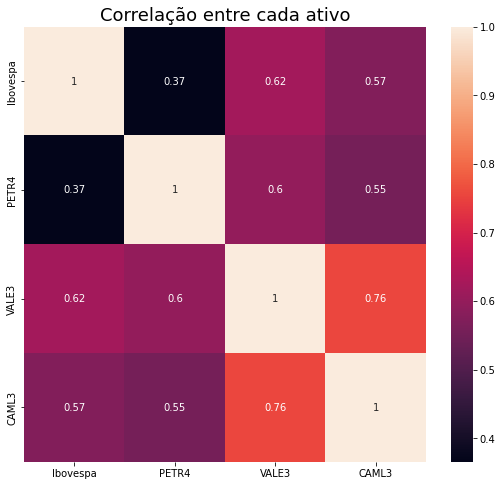

In [17]:
fig7 = plt.figure(figsize = (9,8))


plt.title("Correlação entre cada ativo", fontsize = 18);
sns.heatmap(matiz_correlacao_acoes_ibov, annot = True)
plt.savefig('Correlação entre cada ativo', dpi = 200)

Gráfico 7

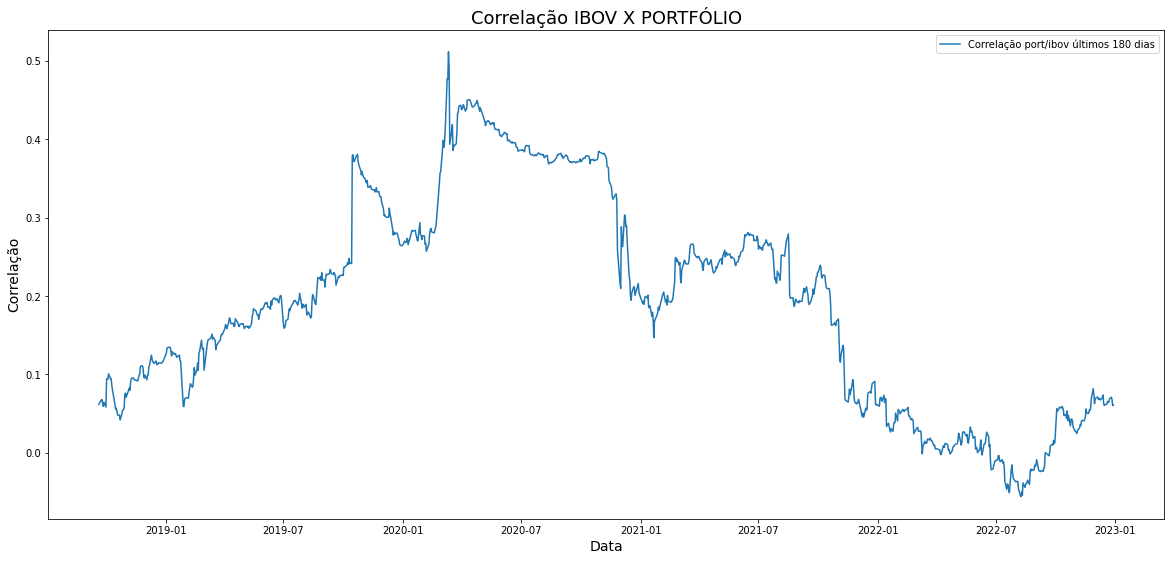

In [18]:
fig8 = plt.figure(figsize = (20,9))

plt.plot(port_ibov['Ibovespa'].rolling(180).corr(port_ibov.iloc[:,1]), label = "Correlação port/ibov últimos 180 dias")
plt.legend()
plt.title('Correlação IBOV X PORTFÓLIO', fontsize = 18)
plt.ylabel('Correlação',
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)
plt.savefig('Correlação IBOV X PORTFÓLIO - 180 dias', dpi = 200)

Gráfico 8

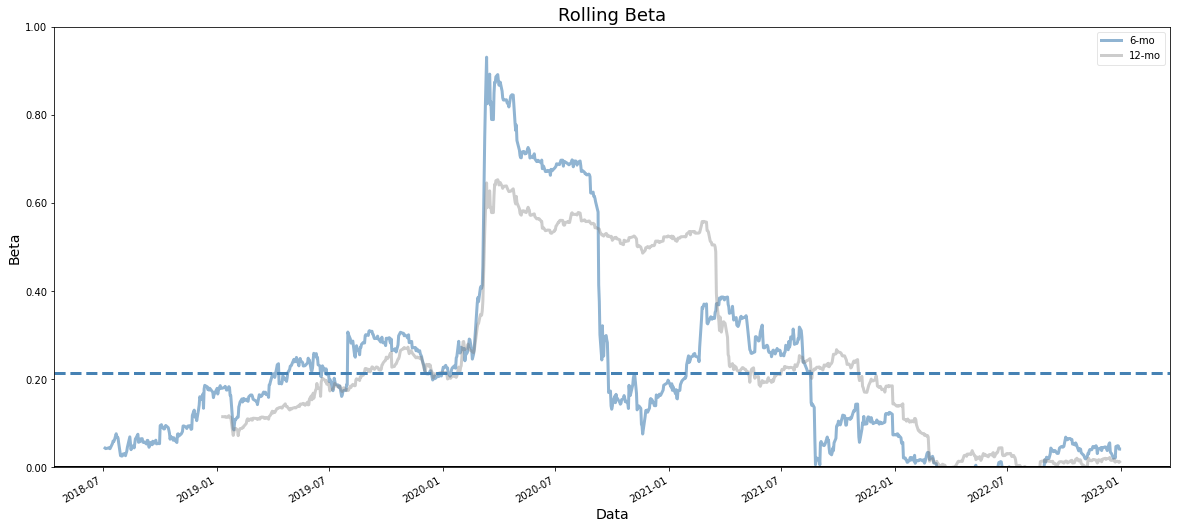

In [19]:
fig9 = plt.figure(figsize = (20,9))

pf.plot_rolling_beta(port_ibov['Portifólio'], port_ibov['Ibovespa'])
plt.ylabel('Beta',
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)
plt.title('Rolling Beta',
          fontsize = 18)
plt.ylim(0,1)
plt.savefig('Rolling Beta', dpi = 200)

Gráfico 9

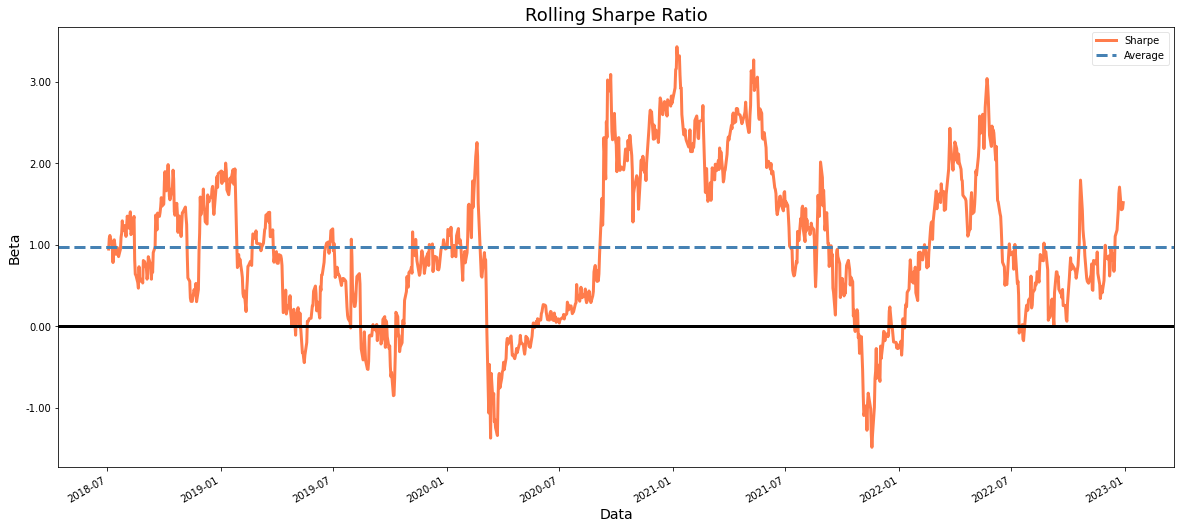

In [20]:
fig10 = plt.figure(figsize = (20,9))

pf.plot_rolling_sharpe(port_ibov['Portifólio'])

plt.title('Rolling Sharpe Ratio',
          fontsize = 18)
plt.ylabel('Beta',
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)

plt.savefig('Rolling Sharpe Ratio', dpi = 200)

Gráfico 10

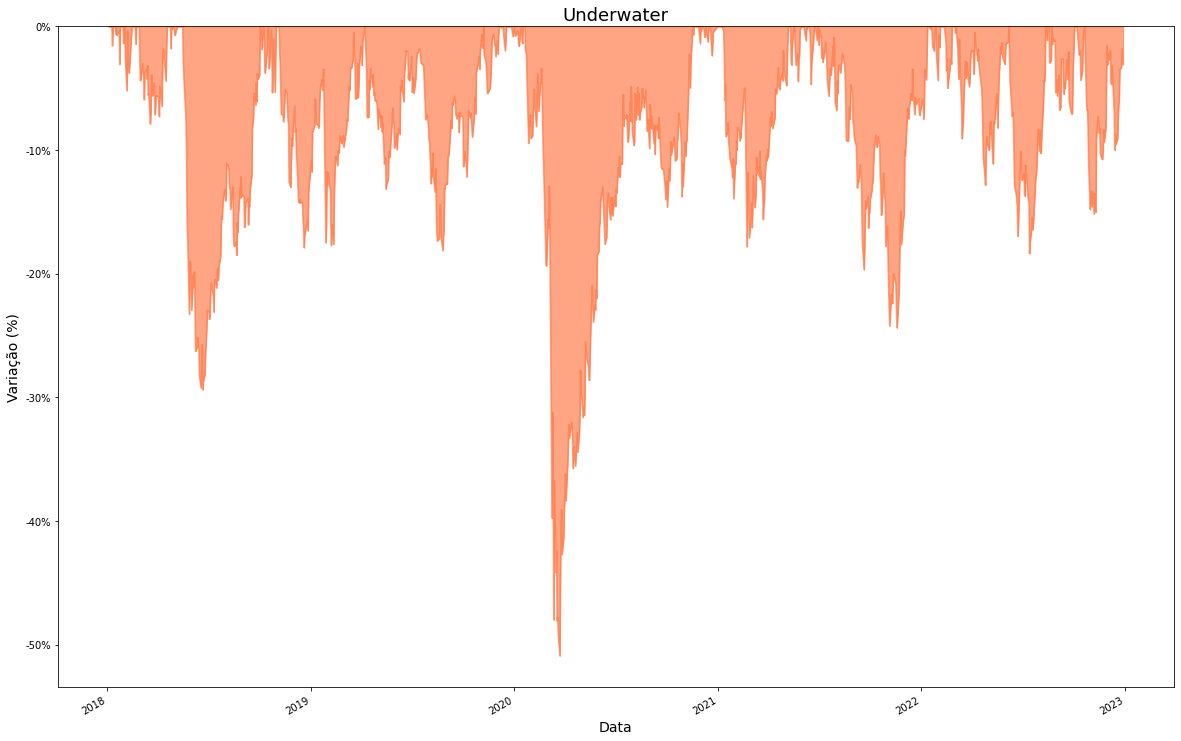

In [21]:
fig11 = plt.figure(figsize = (20,13.5))

pf.plot_drawdown_underwater(port_ibov['Portifólio']);

plt.title('Underwater',
          fontsize = 18)
plt.ylabel('Variação (%)',
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)

plt.savefig('Underwater', dpi = 200)

Gráfico 11

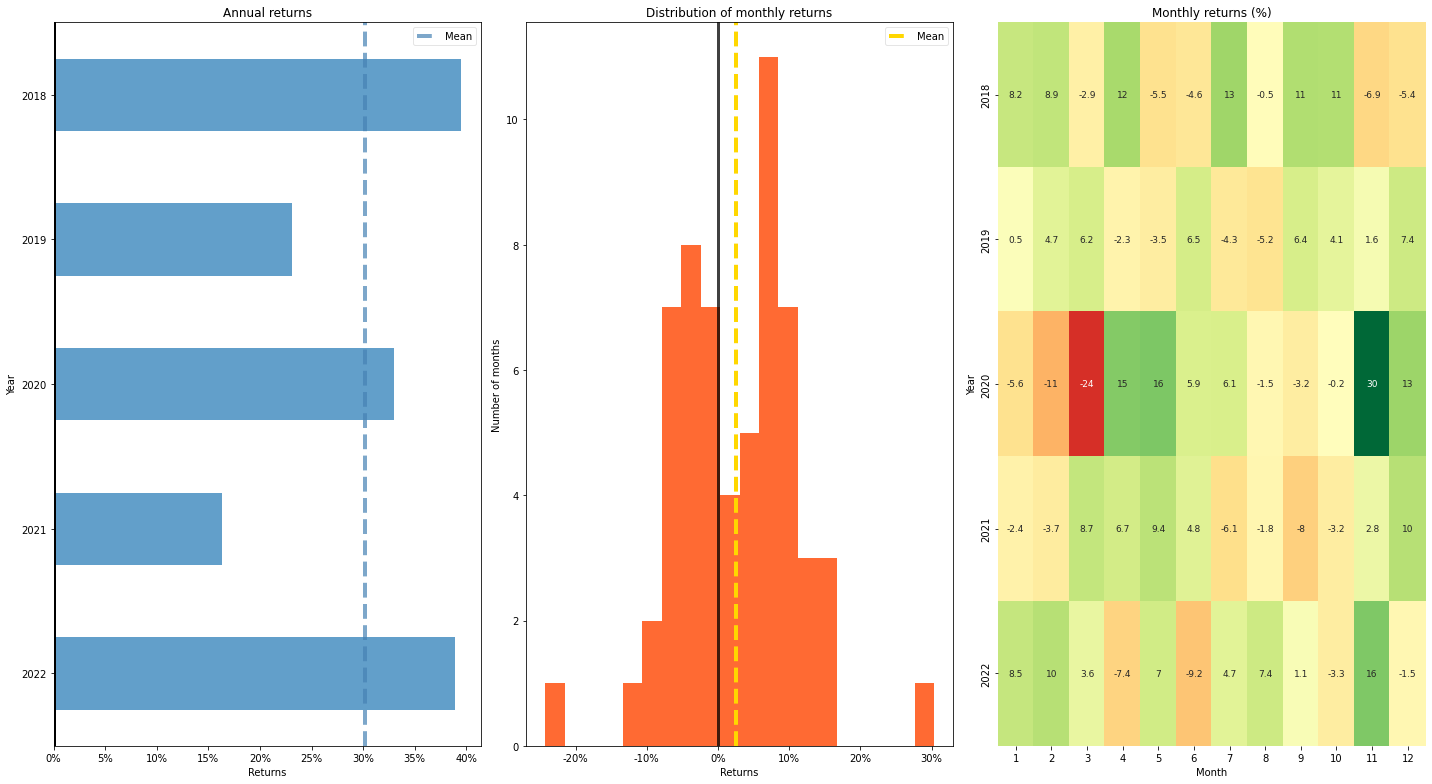

In [22]:
fig12 = plt.figure(1, figsize = (20,11))
plt.subplot(1,3,1)
pf.plot_annual_returns(port_ibov['Portifólio'])
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(port_ibov['Portifólio'])
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(port_ibov['Portifólio'])
plt.tight_layout()
fig.set_size_inches(30,10)

plt.savefig('Retornos.png', dpi = 200)

Monte Carlo

In [28]:
drift = np.array(dados['Retorno'].mean() - dados['Retorno'].var()/2)
std = np.array(dados['Retorno'].std())
t_intervalo = 360
iteracao = 100
retorno_diario = np.exp(drift + std * norm.ppf(np.random.rand(t_intervalo, iteracao)))
port_valores = pd.DataFrame(np.dot(dados.iloc[: , 1 : len(acoes) + 1], pesos.T))
s0 = port_valores.iloc[-1]
preco_lista = np.zeros_like(retorno_diario)
preco_lista[0] = s0
for t in range(1, t_intervalo):
    preco_lista[t] = preco_lista[t - 1] * retorno_diario[t]
preco_lista = pd.DataFrame(preco_lista)
columnames = []
for i in range(iteracao):
  columnames.append('simulação {}'.format(i+1))
preco_lista.columns = columnames
port_mc = preco_lista/preco_lista.iloc[0]
melhores_piores_desemp = port_mc.iloc[-1].sort_values()
carteira_mc = pd.DataFrame()
carteira_mc['Pior carteira'] = port_mc[melhores_piores_desemp.index[0]]
carteira_mc['Melhor carteira'] = port_mc[melhores_piores_desemp.index[iteracao-1]] 
carteira_mc['Carteira mediana'] = port_mc[melhores_piores_desemp.index[iteracao-int(iteracao/2)]]



Gráfico Monte Carlo 1


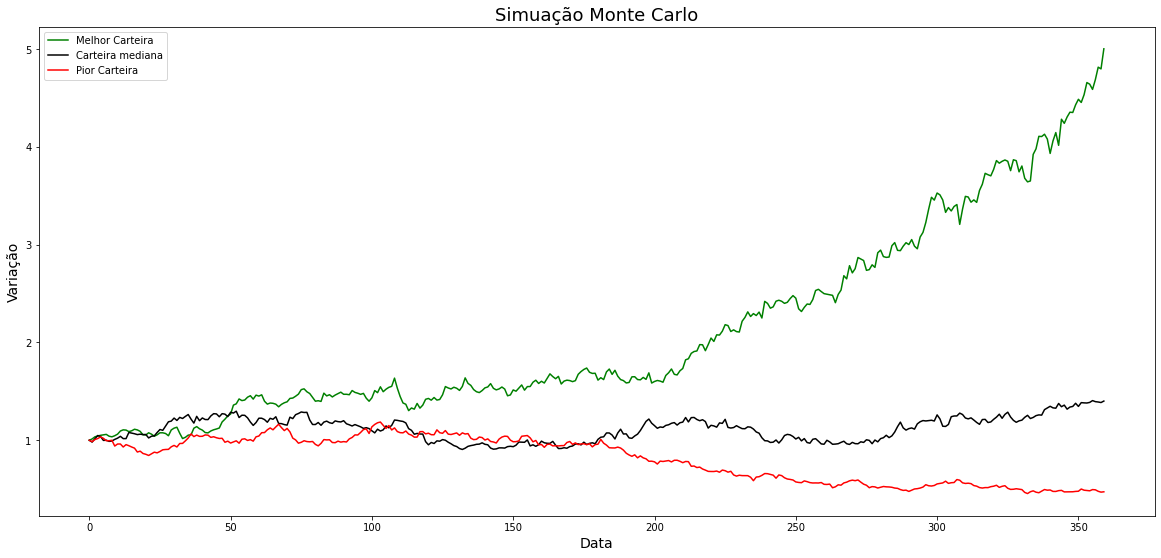

In [49]:
fig13 = plt.figure(1, figsize = (20,9))

plt.title('Simuação Monte Carlo',
          fontsize = 18)
plt.ylabel('Variação',
           fontsize = 14)
plt.xlabel("Data",
           fontsize = 14)


plt.plot(carteira_mc['Melhor carteira'], label = 'Melhor Carteira', color = 'green')
plt.plot(carteira_mc['Carteira mediana'], label = 'Carteira mediana', color = 'black')
plt.plot(carteira_mc['Pior carteira'], label = 'Pior Carteira', color = 'red')
plt.legend()
plt.savefig('Monte_Carlo1.png', dpi = 200)

Gráfico Monte Carlo 2

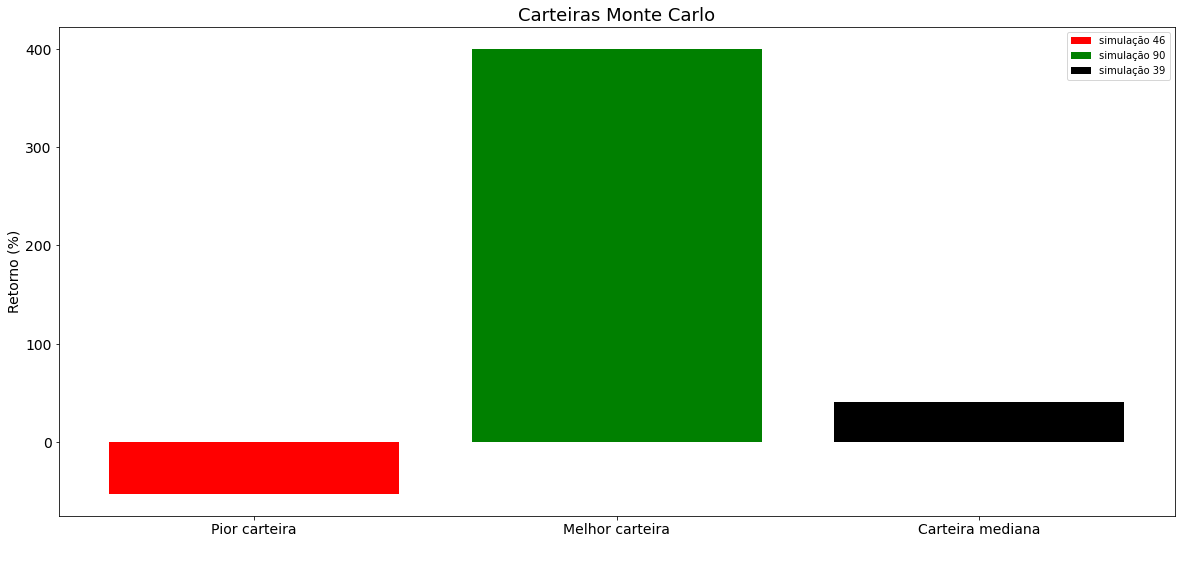

In [67]:
fig14 = plt.figure(1, figsize = (20,9))

plt.bar('Pior carteira', list(carteira_mc.iloc[ -1 , :] - 1)[0] * 100, label = melhores_piores_desemp.index[0], color = 'red')
plt.bar('Melhor carteira', list(carteira_mc.iloc[ -1 , :] - 1)[1] * 100, label = melhores_piores_desemp.index[iteracao-1], color = 'green')
plt.bar('Carteira mediana', list(carteira_mc.iloc[ -1 , :] - 1)[2] * 100, label = melhores_piores_desemp.index[iteracao-int(iteracao/2)], color = 'black')

plt.title('Carteiras Monte Carlo',
          fontsize = 18)
plt.ylabel('Retorno (%)',
           fontsize = 14)
plt.xlabel('  ',
           fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend()

plt.savefig('Monte_Carlo2.png', dpi = 200)

VAR

In [43]:
alpha = 0.05
media_retorno = port_ibov['Portifólio'].mean()
std = port_ibov['Portifólio'].std()

var = norm.ppf(alpha, media_retorno, std)

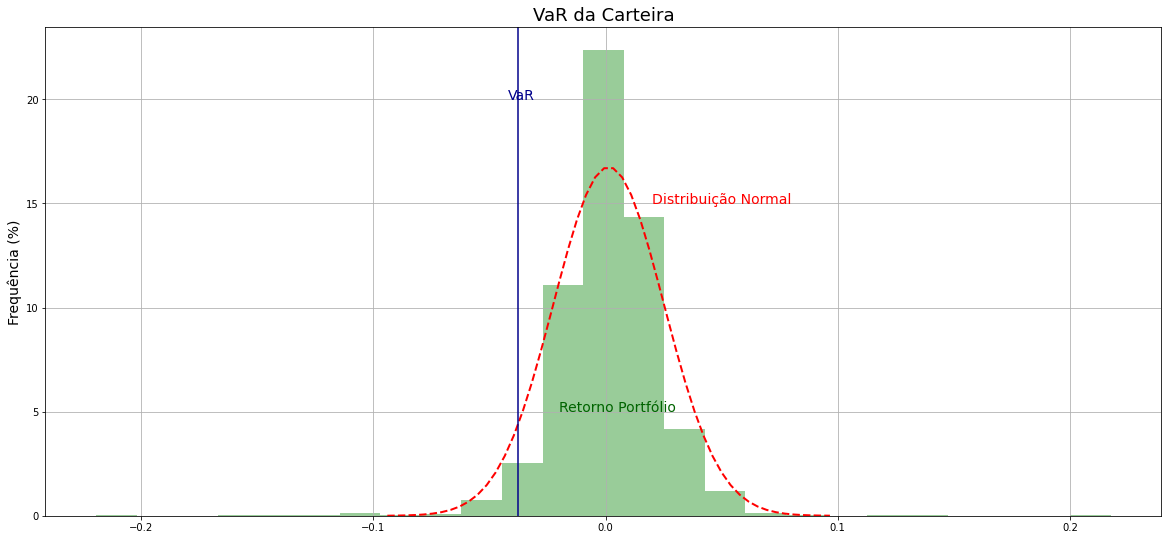

In [52]:
fig15 = plt.figure(1, figsize = (20,9))

plt.title('VaR da Carteira',
          fontsize = 18)
plt.ylabel('Frequência (%)',
           fontsize = 14)
plt.xlabel('  ',
           fontsize = 14)

port_ibov['Portifólio'].hist(bins=25, density=True, alpha=0.4, color='green');

x = np.linspace((media_retorno - 4*std), (media_retorno + 4*std), 50)
plt.plot(x, norm.pdf(x, media_retorno, std), 'r--', lw=2)

plt.axvline(x=var, color = 'darkblue')

plt.text(0.02, 15, 'Distribuição Normal', fontsize=14, color='red')
plt.text(-0.02, 5, 'Retorno Portfólio', fontsize=14, color='darkgreen')
plt.text(-0.042, 20, 'VaR', fontsize=14, color='darkblue')


plt.savefig('VAR.png', dpi = 200)

PDF

In [66]:
width = 210
height = 297

# 1. Setup PDF
pdf = FPDF()
#PAGE 1 
pdf.add_page()
pdf.image('topo.png', 0, 0, width)
pdf.image('barra.png', 40, height/2-30, 5)
pdf.set_font('Arial', 'B', 40)

pdf.cell(40)
pdf.cell(0, 240, 'RELATÓRIO', 0, 0, 'L')

pdf.ln(20)
pdf.cell(40)
pdf.cell(0, 240, 'CARTEIRA', 0, 0, 'L')
pdf.set_font('Arial','' ,15)

pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')


#PAGE 2
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(10, 10, f'Relatório Carteira: {nome} - {hoje.day}/{hoje.month}/{hoje.year}')
pdf.image('Fronteira Eficiente de Markowitz.png', 0, 17, width)
pdf.image('Mín Variância x Sharpe Ratio.png', 0, 102, width)
pdf.image('Ações e Ibov.png', 0, 188, width)
pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')


#PAGE 3
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, f'Relatório Carteira: {nome} - {hoje.day}/{hoje.month}/{hoje.year}')
pdf.image('Portfólio X Ibov.png', 0, 17, width)
pdf.image('Volatilidade do portfólio em períodos.png', 0, 102, width/2)
pdf.image('Ibovespa x Portfólio - comparação.png', width/2, 102, width/2)
pdf.image('Correlação entre Ibov e carteira.png', 0, 188, width/2)
pdf.image('Correlação entre cada ativo.png', width/2, 188, width/2)
pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')

#PAGE 4
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, f'Relatório Carteira: {nome} - {hoje.day}/{hoje.month}/{hoje.year}')
pdf.image('Correlação IBOV X PORTFÓLIO - 180 dias.png', 0, 17, width)
pdf.image('Rolling Beta.png', 0, 102, width)
pdf.image('Rolling Sharpe Ratio.png', 0, 188, width)
pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')

#PAGE 5
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, f'Relatório Carteira: {nome} - {hoje.day}/{hoje.month}/{hoje.year}')
pdf.image('Underwater.png', 0, 17, width)
pdf.image('Retornos.png', 0, 150, width)
pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')

#PAGE 6
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(40, 10, f'Relatório Carteira: {nome} - {hoje.day}/{hoje.month}/{hoje.year}')
pdf.image('Monte_Carlo1.png', 0, 17, width)
pdf.image('Monte_Carlo2.png', 0, 102, width)
pdf.image('VAR.png', 0, 188, width)
pdf.image('rodape_git.png', 0,height-18,width, 
          link = 'https://github.com/joelsoaresjr')


# 3. Output PDF
pdf.output('Relatório_Carteira.pdf', 'F')


''